
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you so much for the updates! This project is hard and very time-consuming because of heavy models. You did an excellent job here, and I hope you enjoyed it.
    
    
I've left a couple of new comments with digit 2. However, I do not have any questions, so the project can be accepted. Good luck! 

    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi! I am a reviewer on this project.  
    

Before we start, I want to pay your attention to the color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ✔️</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ⚠️</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ❌</b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content, however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review. 
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> thank you very much for sending the project for a review! You have successfully employed advanced techniques such as lemmatization and vectorizing, and trained several models. Great job! The results look very good. 
    
    
However, would you add small conclusions about each chart in the EDA section and about each model in the `Working with models`? There are also a couple of issues in the model evaluation sections.

    

</div>

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Good introduction! 
    
</div>

## Initialization

In [1]:
import math
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
import sklearn.metrics as metrics

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
It's a very useful thing, by the way.     
</div>

## Load Data

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


In [5]:
#Checking for missing values
df_reviews.isnull().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
- We can drop missing values. 


- We can also check for the tricky duplicates, such as `'review' - 'pos' - 'ds_part'` duplicates.  
</div>

In [6]:
#Ensure the 'votes' column is of the correct type
df_reviews['votes'] = df_reviews['votes'].astype('Int64')

- Preprocess text data

In [7]:
def preprocess_text(text):
    
    #Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-z\s]', '', text)
    
    return text

#Apply text precessing to 'review column'
df_reviews['review'] = df_reviews['review'].apply(preprocess_text)
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,the pakage implies that warren beatty and gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,how the hell did they get this made presenting...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,there is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,um a serious film about troubled teens in sin...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,im totally agree with garryjohal from singapor...,9,pos,1,test,9281


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Good.     

</div>

## EDA

Let's check the number of movies and reviews over years.

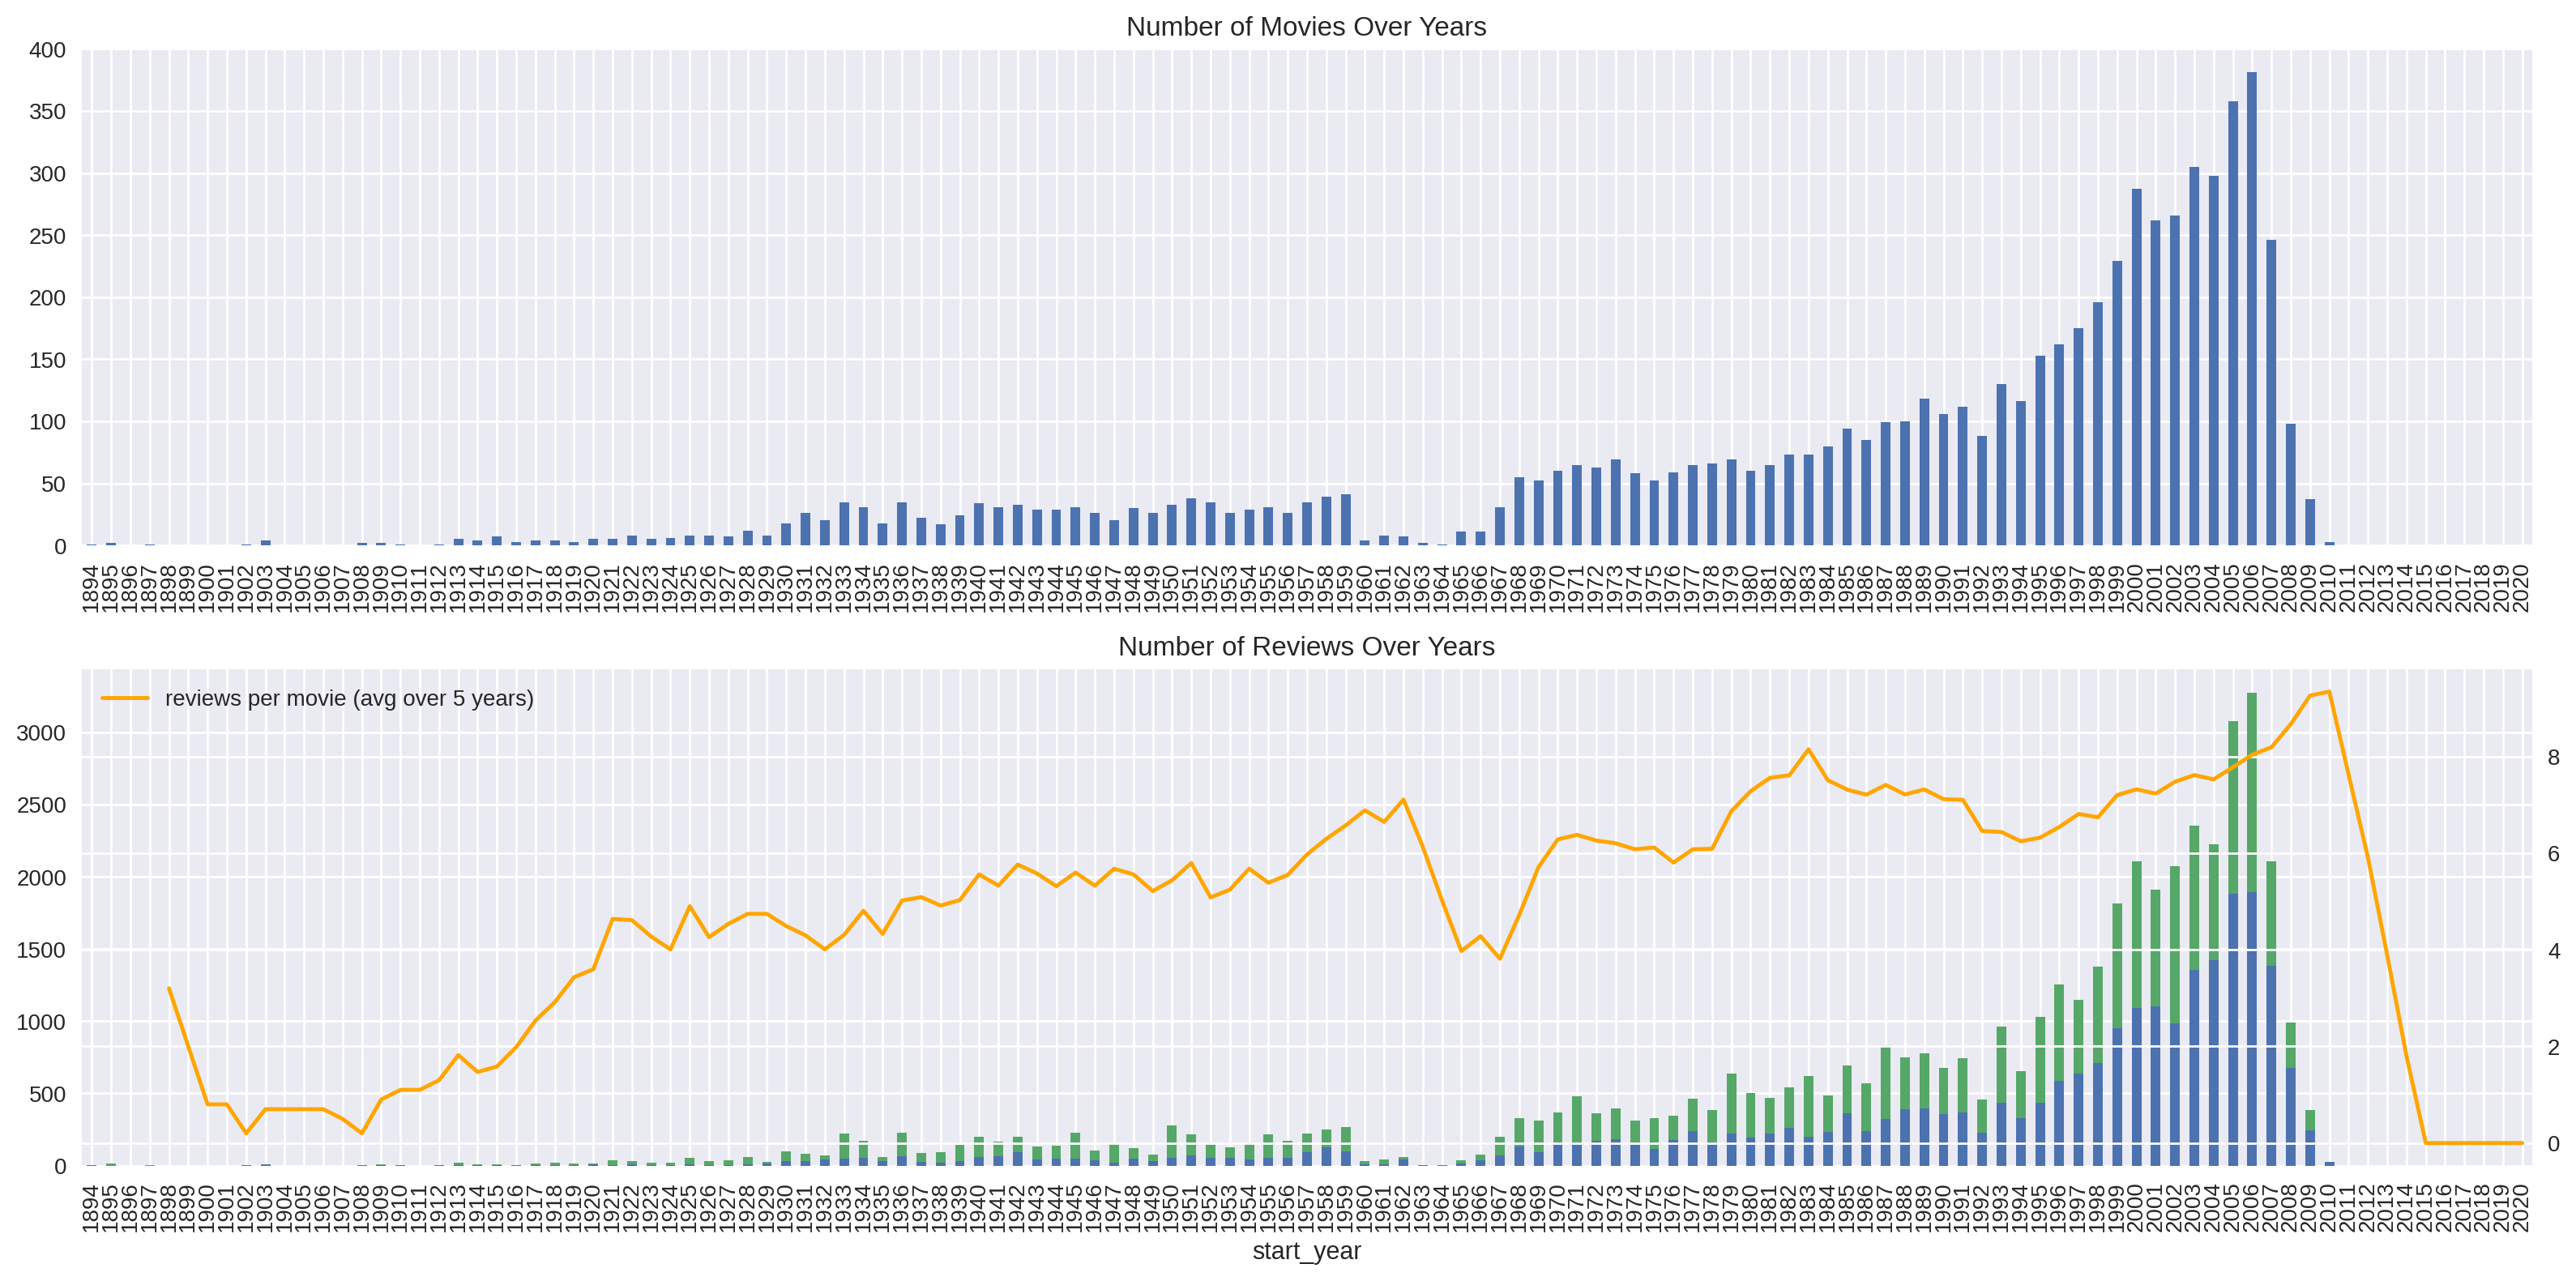

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Nice charts! 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
    
However, what can we infer from them?
    
</div>

- Findings for the charts:

1.The first chart displays the number of movies produced each year. There is a noticeable trend in movie production, with fluctuations over the years. The chart helps identify periods of increased or decreased production. The number of movies produced each year has varied significantly, highlighting certain years with peaks and troughs in production. This could be influenced by various factors such as technological advancements, economic conditions, and cultural trends.

2.The second chart shows the number of positive and negative reviews per year, stacked on top of each other. This stacked bar chart gives a clear view of the sentiment distribution in reviews over the years. The orange line in the second chart represents the average number of reviews per movie over a rolling 5-year period. This metric provides an understanding of the engagement or interest in movies over time. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Excellent! 
    
</div>

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

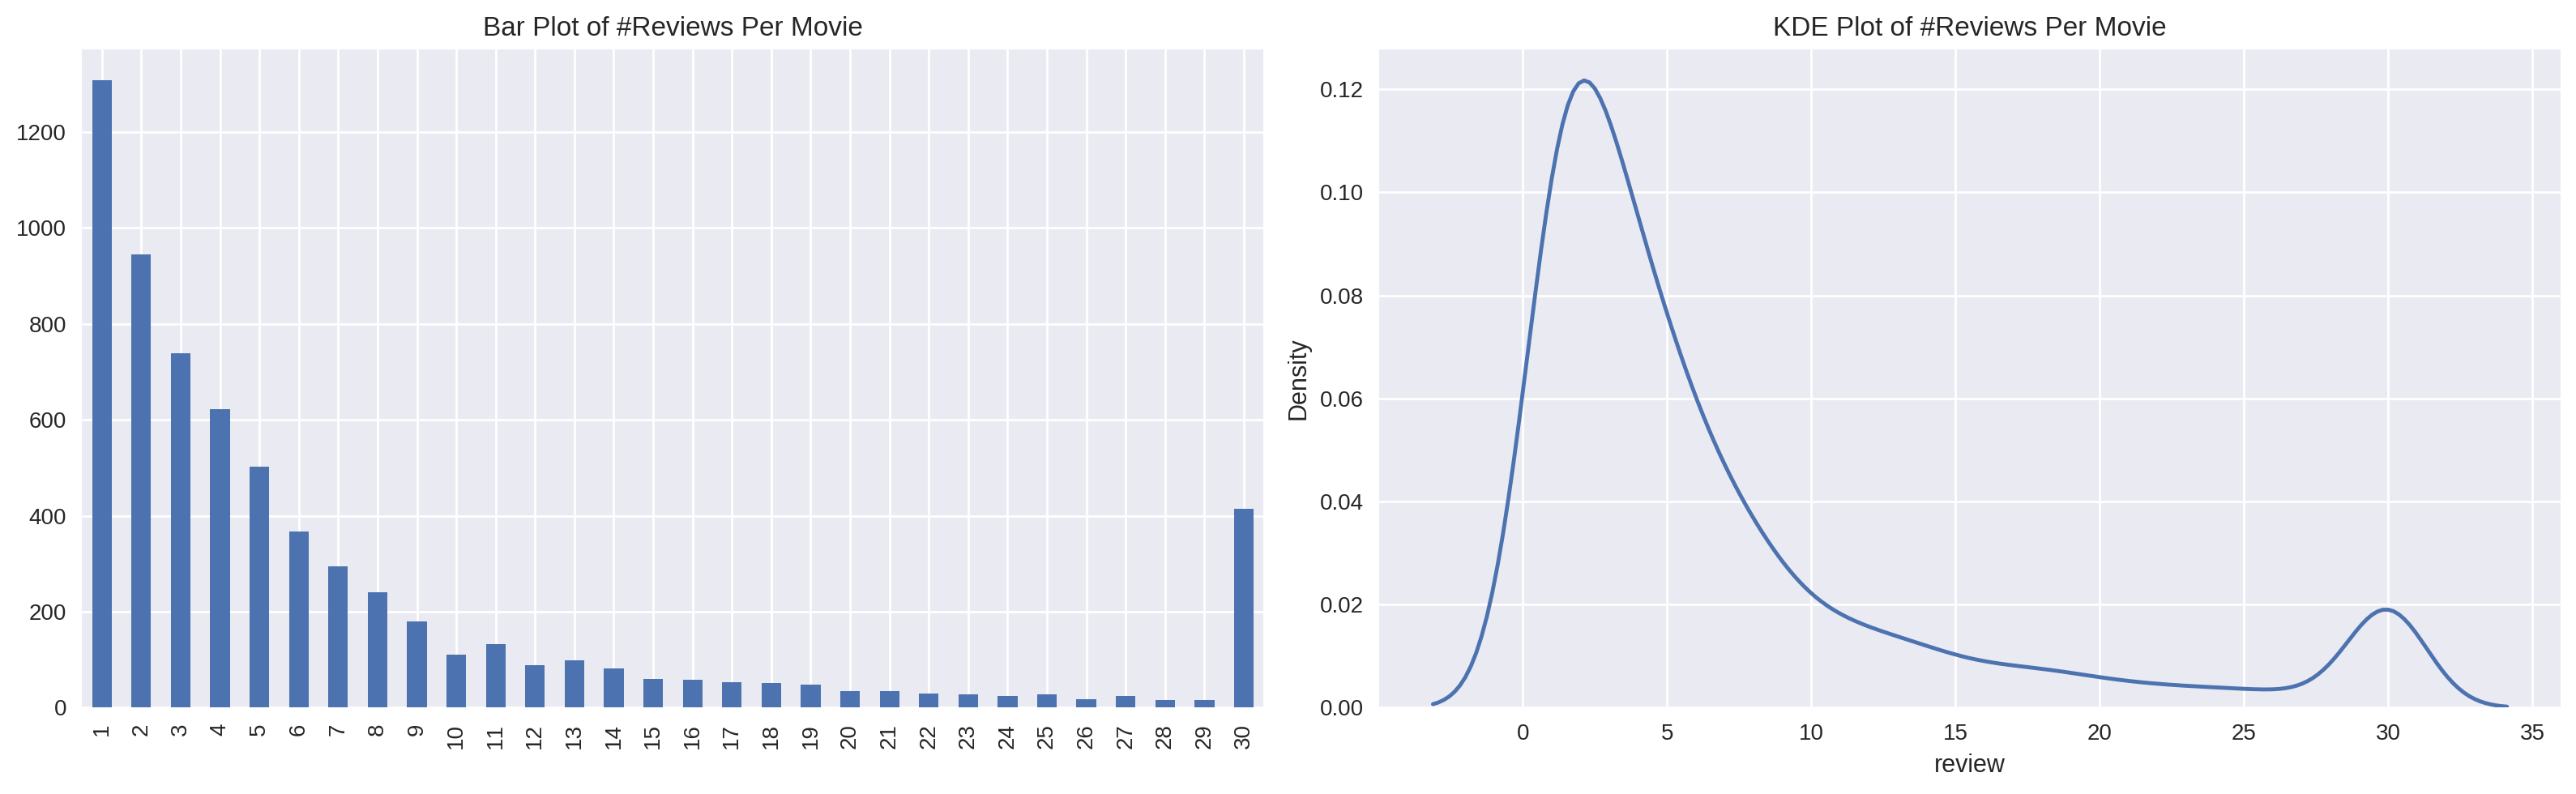

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
    
In your opinion, why do we have a peak there? Please do not forget to add intermediate conclusions. 

</div>

- The two visualizations provide a detailed look into the distribution of the number of reviews per movie:

1. The bar plot on the left shows the frequency distribution of the number of reviews each movie received. This plot indicates how many movies received a certain number of reviews. The x-axis represents the number of reviews per movie, and the y-axis represents the count of movies that received that number of reviews. It is evident that a significant number of movies receive very few reviews, while a smaller number of movies receive a high volume of reviews.
2. The KDE (Kernel Density Estimate) plot on the right provides a smoothed distribution of the number of reviews per movie. This plot helps in understanding the probability density of the number of reviews per movie. The KDE plot indicates the presence of a peak around the lower number of reviews, confirming that most movies tend to receive fewer reviews, with a long tail showing that some movies get a much higher number of reviews.

Findings:
Both plots show that the majority of movies receive a small number of reviews, while a few movies receive a large number of reviews. This suggests that audience engagement is highly skewed, with popular movies attracting significantly more attention.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Agreed.     
</div>

In [10]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

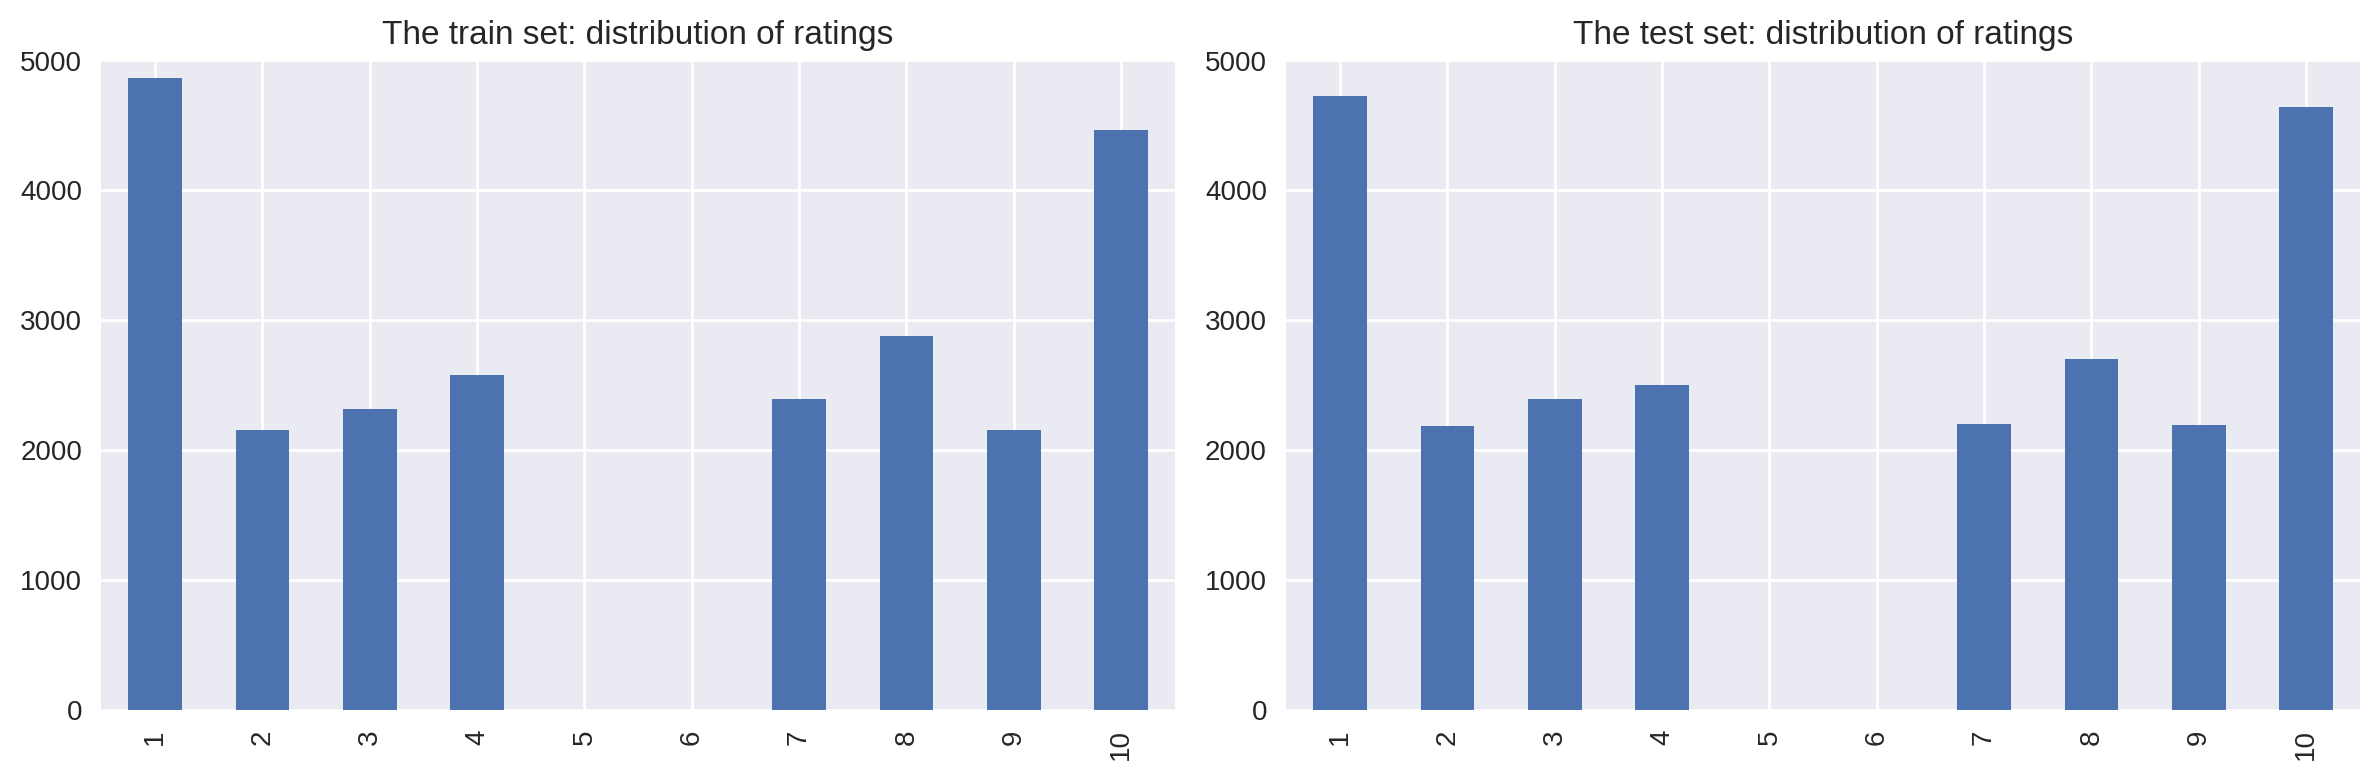

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
    
So what can we say about the distribution? 
</div>

The two bar plots provide a comparative view of the distribution of movie ratings in the training and test datasets:

1. The bar plot on the left shows the distribution of ratings in the training dataset.The x-axis represents the rating values (from 1 to 10), and the y-axis represents the count of reviews for each rating. The plot indicates a relatively even distribution of ratings, with some peaks and troughs. The number of ratings for each value is generally below 5000, suggesting a balanced training set.

2. The bar plot on the right shows the distribution of ratings in the test dataset. Similar to the training set, the x-axis represents the rating values (from 1 to 10), and the y-axis represents the count of reviews for each rating. The distribution pattern in the test set closely mirrors that of the training set, with counts generally below 5000 for each rating. This suggests that the test set is also well-balanced

Findings:
Both the training and test datasets exhibit a balanced distribution of ratings. This balance is crucial for ensuring that the model trained on the training set can generalize well to the test set.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Very good, thank you so much! 
    
</div>

Distribution of negative and positive reviews over the years for two parts of the dataset

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


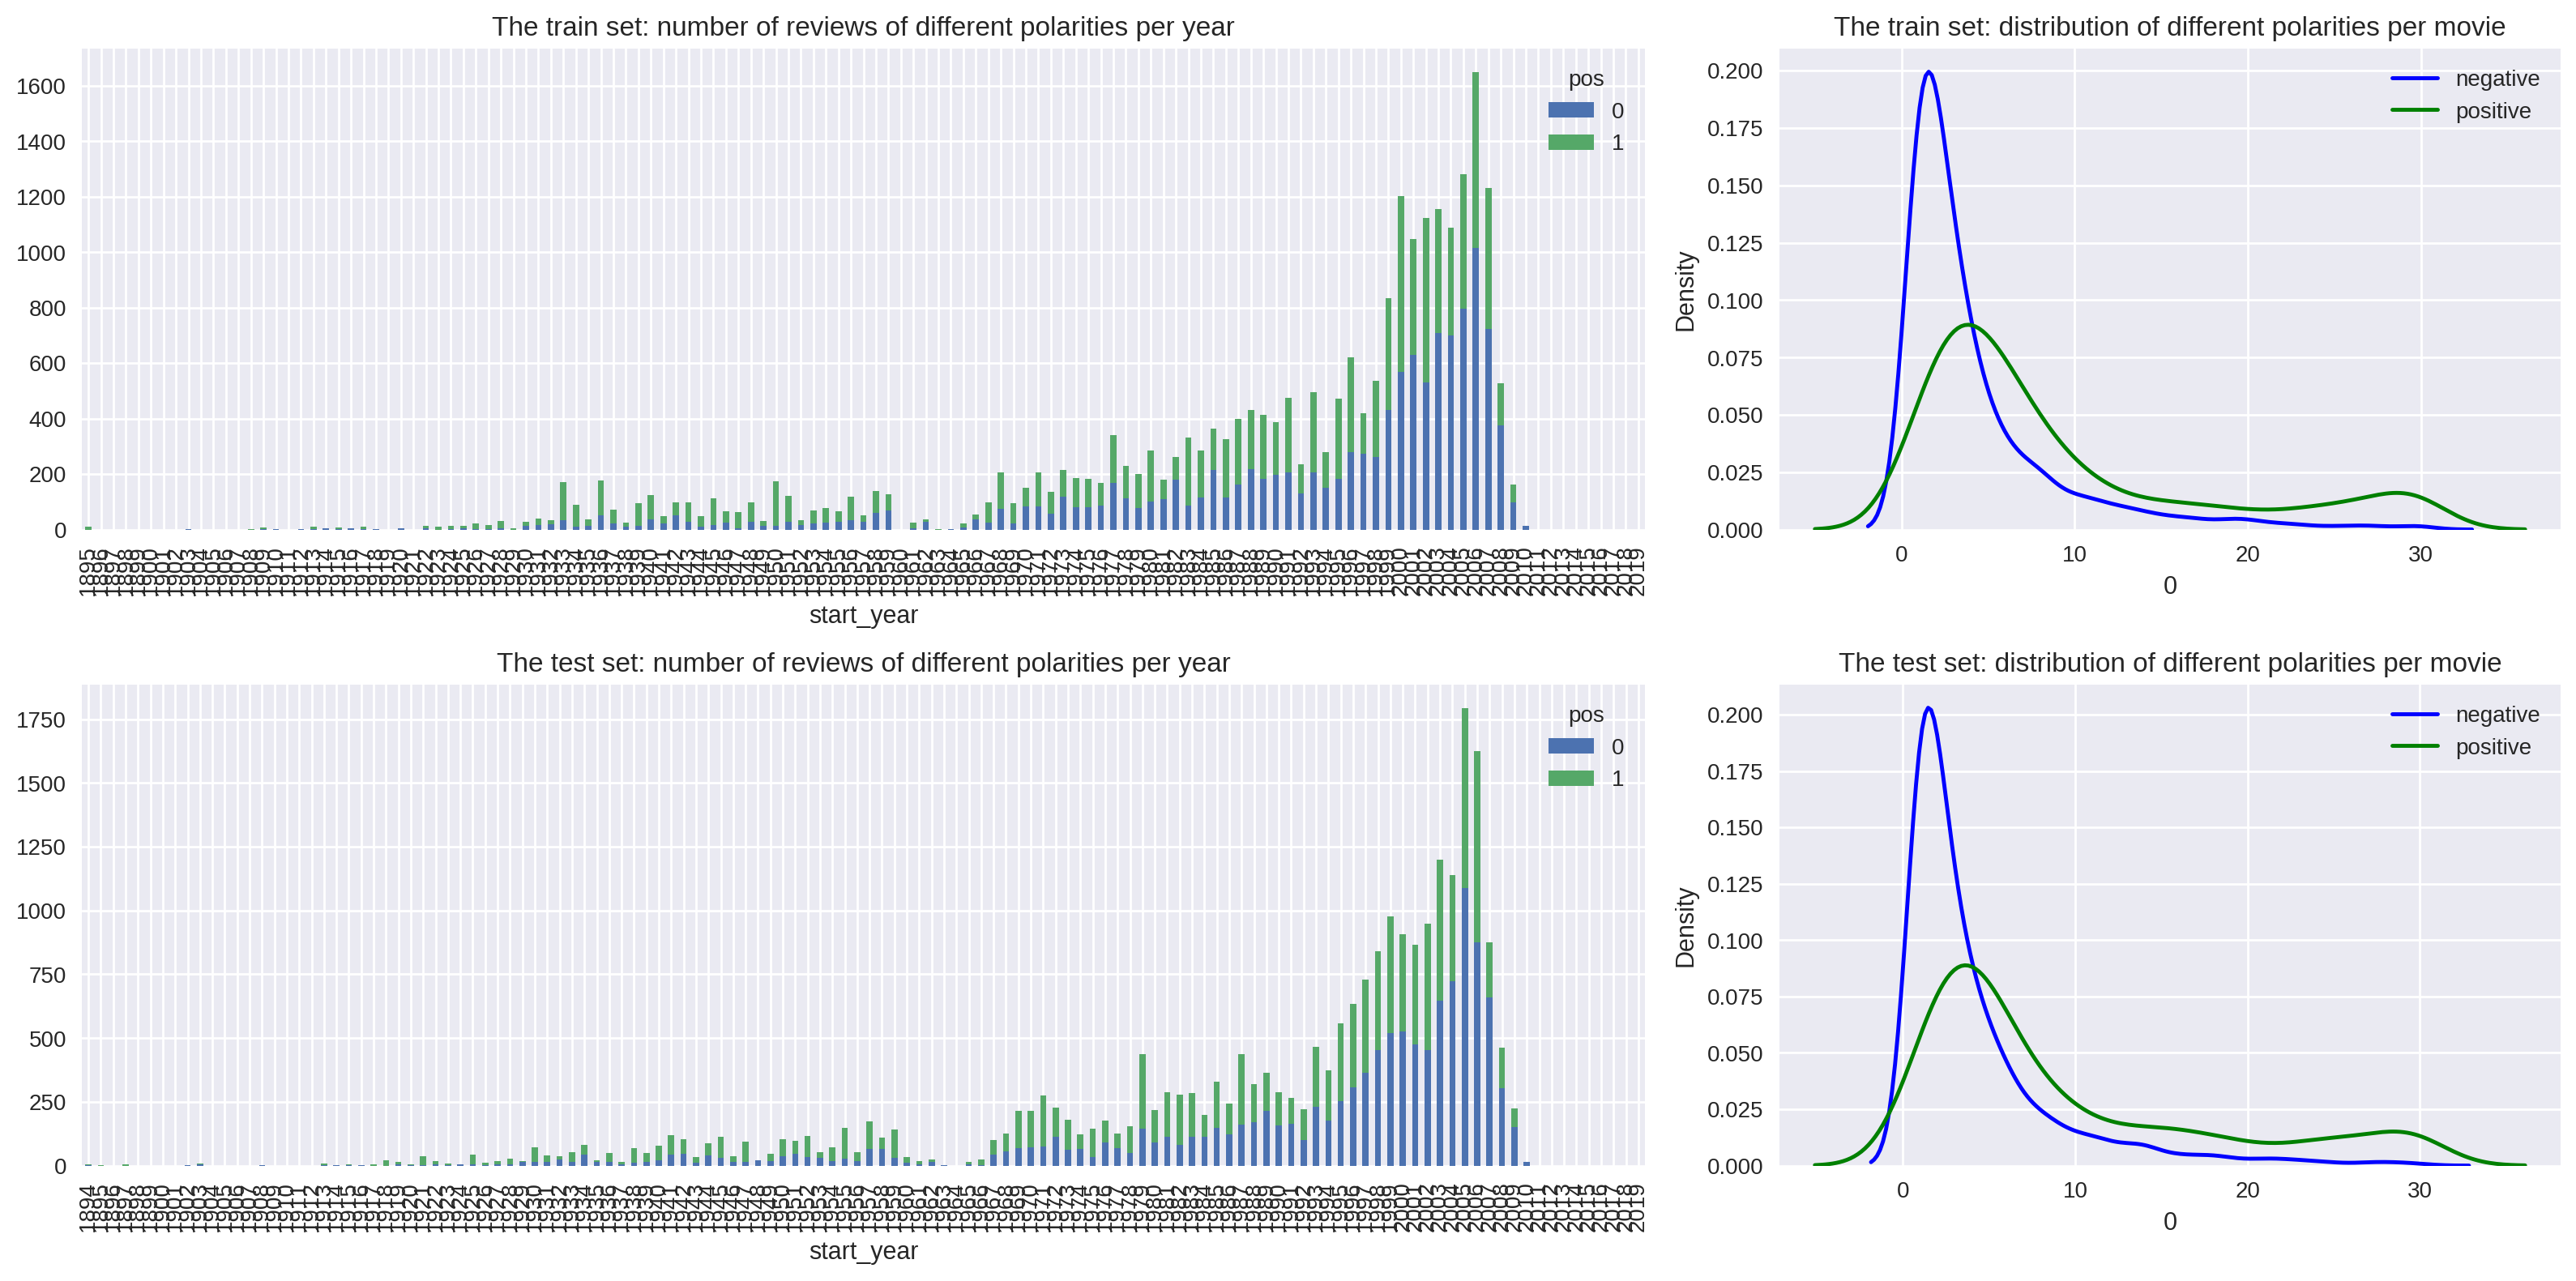

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Very good charts! 
    
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
    
It will be perfect after you add a conclusion.
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Perfect! 
    
</div>

The visualizations provide a comprehensive view of the distribution of negative and positive reviews over the years for both the training and test parts of the dataset:

1-2. The bar plots (top-left and bottom-left) show the annual number of positive and negative reviews in the training and test sets, respectively. Both plots indicate the number of reviews for each year, with positive and negative reviews stacked on top of each other. This helps identify trends in review sentiment over the years.

3-4. The KDE (Kernel Density Estimate) plots (top-right and bottom-right) display the distribution of positive and negative reviews per movie in the training and test sets, respectively. These plots show the density of reviews, with separate lines for positive and negative reviews, providing insights into how often movies receive varying numbers of positive or negative reviews.

Findings:
In both the training and test sets, there is a noticeable variation in the number of reviews over the years. Some years show higher activity with more reviews, while others have fewer.
The stacked bar plots show that both positive and negative reviews are present each year, reflecting ongoing engagement and sentiment variation in the reviews.

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [13]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return df_eval_stats, fig

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

- According to [PEP8](https://peps.python.org/pep-0008/), we should always put imports at the top of the file.   


- Notice that **type** veriable is green in the function above. When you see that your variables are green, you should think of another name, since green color indicates that this name is reserved in python. I know that our example on the platform included a similar code, but it is a great opportunity to point out this thing. 
</div>

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [14]:
df_reviews['review_norm'] = df_reviews['review'].str.lower().str.replace('[^a-zA-Z]',' ')# <put your code here>
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx,review_norm
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,the pakage implies that warren beatty and gold...,1,neg,0,train,8335,the pakage implies that warren beatty and gold...
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,how the hell did they get this made presenting...,1,neg,0,train,8336,how the hell did they get this made presenting...
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,there is no real story the film seems more lik...,3,neg,0,test,2489,there is no real story the film seems more lik...
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,um a serious film about troubled teens in sin...,7,pos,1,test,9280,um a serious film about troubled teens in sin...
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,im totally agree with garryjohal from singapor...,9,pos,1,test,9281,im totally agree with garryjohal from singapor...


## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [15]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Correct. 

</div>

## Working with models

### Model 0 - Constant

          train  test
Accuracy   0.50  0.50
F1         0.67  0.67
APS        0.50  0.50
ROC AUC    0.50  0.50


(          train  test
 Accuracy   0.50  0.50
 F1         0.67  0.67
 APS        0.50  0.50
 ROC AUC    0.50  0.50,
 <Figure size 2000x600 with 3 Axes>)

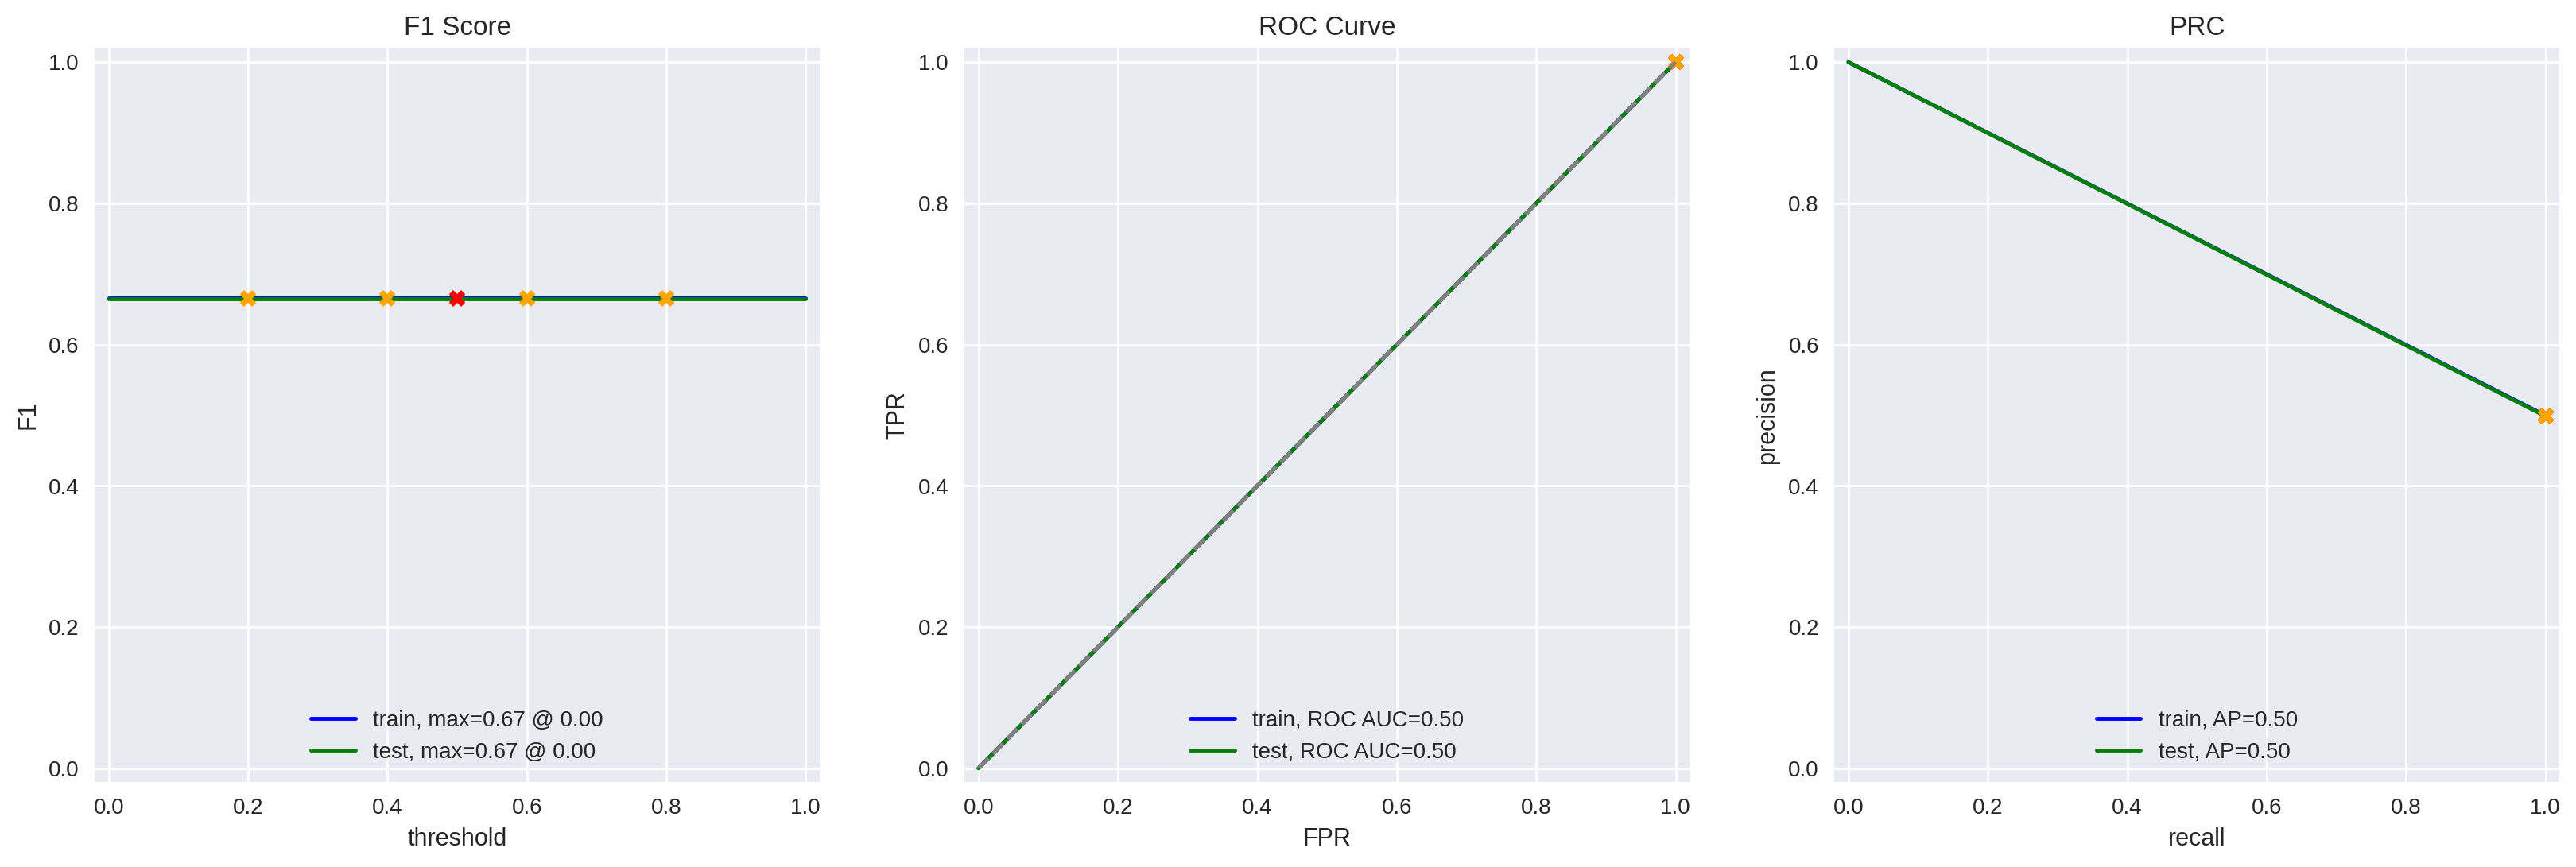

In [16]:
from sklearn.dummy import DummyClassifier

model = DummyClassifier(strategy='constant', constant=1)
model_0 = model.fit(X=df_reviews_train, y=train_target)

evaluate_model(model_0, np.empty(len(train_target)), train_target, np.empty(len(test_target)), test_target)

Findings:

The constant model achieves an accuracy that reflects the proportion of the majority class (positive reviews) in the dataset. It always predicts "positive," accuracy depends on the prevalence of positive reviews in the dataset. 

The F1 score for this model is relatively low because it always predicts positive reviews, resulting in poor performance on negative reviews. This is evident if the dataset has a large number of negative reviews.

The ROC AUC and precision-recall curves are not meaningful for the constant model since it doesn't produce a probability distribution for predictions. The ROC AUC score would be 0.5, indicating no discriminative ability.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment</b>
  
    
- Let's  call the `evaluate_model` method for this model in order to display the chart and other metrics. 
    
    
- Please add a conclusion here. How does the constant model perform? 
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Yes, it's not the best performance, but at the same time, it's exactly what we should expect here. 

</div>

In [17]:
#evaluate_model(model_1, train_features, train_target, test_features, test_target)

### Model 1 - NLTK, TF-IDF and LR

TF-IDF

In [18]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

In [19]:
tfidf_vectorizer_1 = TfidfVectorizer(stop_words=stopwords.words('english'), lowercase=True)

#nltk.download('stopwords')

train_features = tfidf_vectorizer_1.fit_transform(df_reviews_train['review_norm'])
test_features = tfidf_vectorizer_1.transform(df_reviews_test['review_norm'])
print(train_features.shape)
print(test_features.shape)

(23796, 105539)
(23535, 105539)


In [20]:
train_target.shape

(23796,)

In [21]:
model_1 = LogisticRegression()
model_1.fit(train_features, train_target)

LogisticRegression()

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


(          train  test
 Accuracy   0.94  0.88
 F1         0.94  0.88
 APS        0.98  0.95
 ROC AUC    0.98  0.95,
 <Figure size 2000x600 with 3 Axes>)

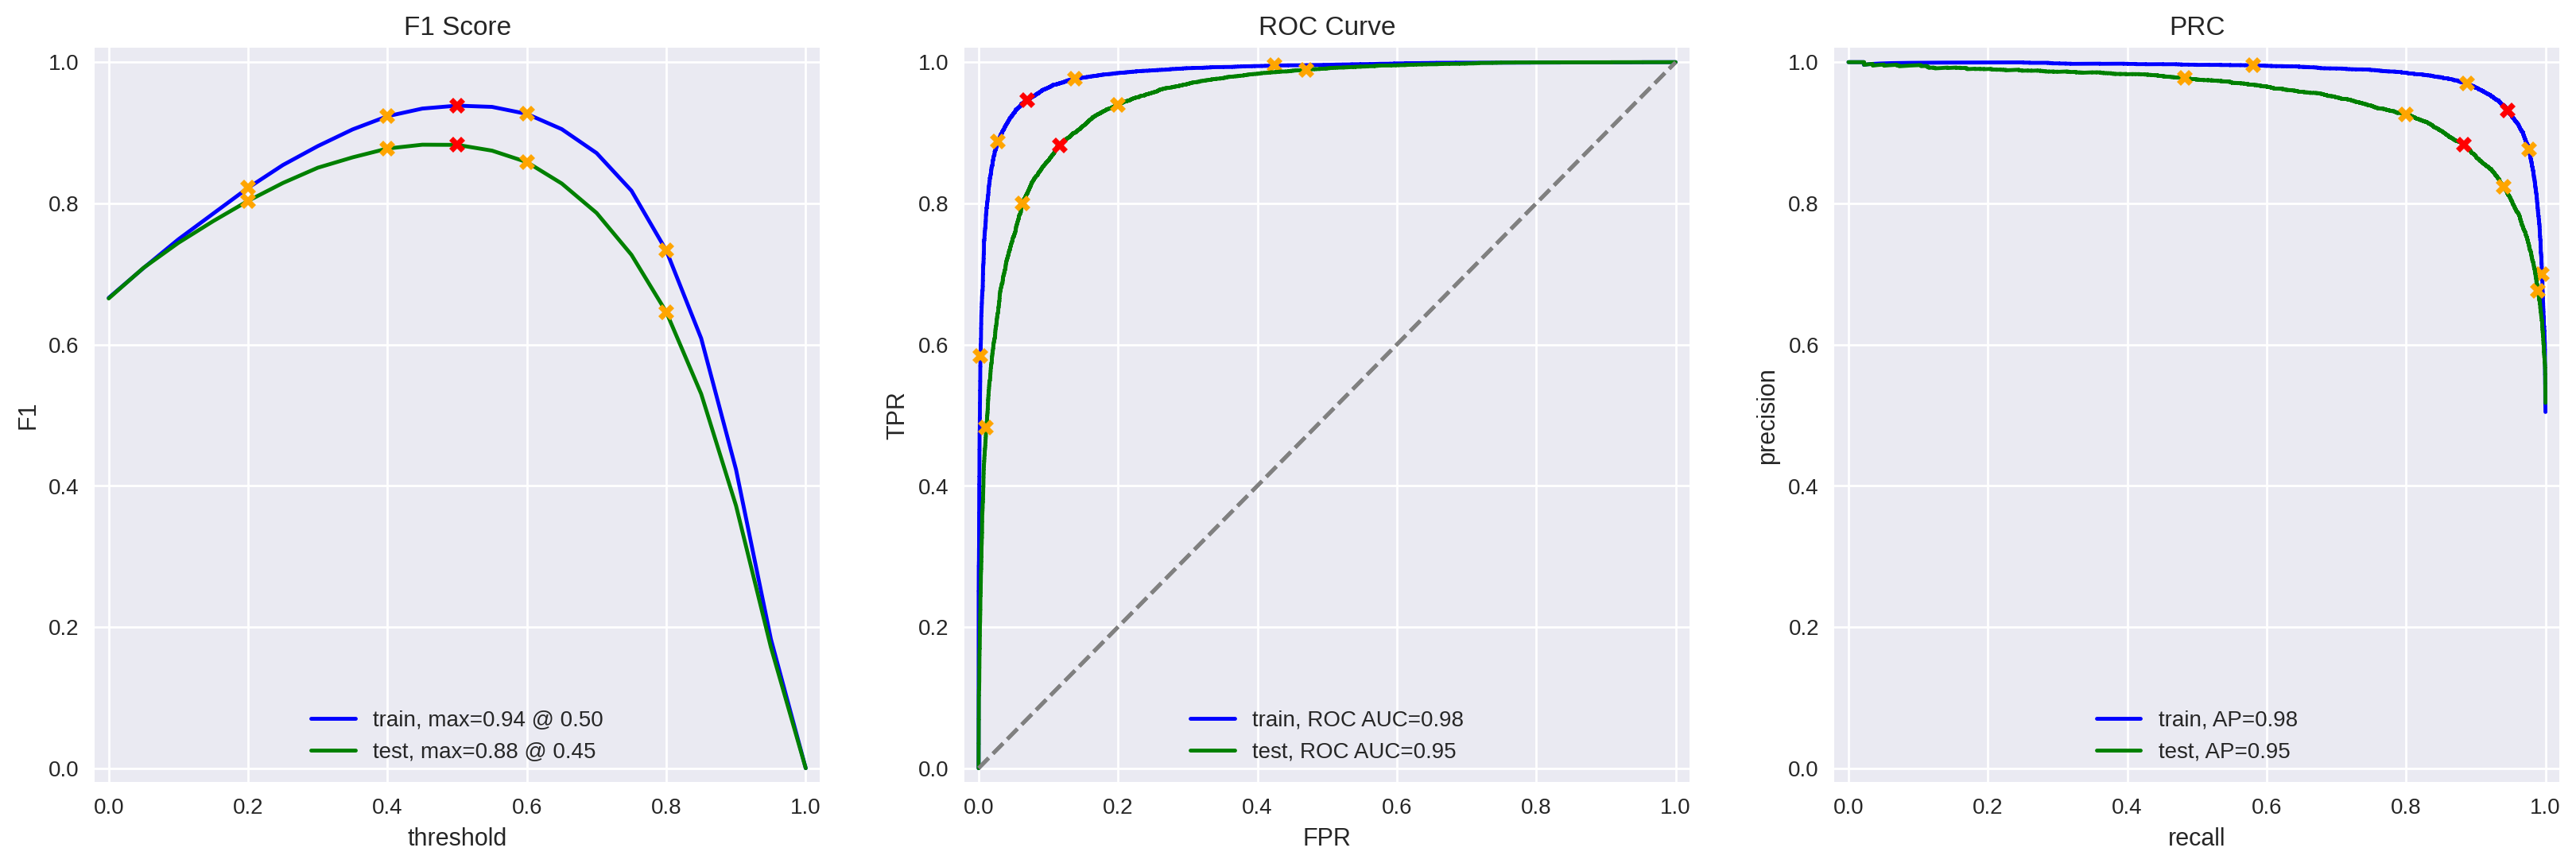

In [22]:
evaluate_model(model_1, train_features, train_target, test_features, test_target)

The logistic regression model achieves significantly higher accuracy on both the training and test sets compared to the constant dummy model. This indicates that logistic regression is able to learn from the data and make more accurate predictions based on the features. 

The F1 score for logistic regression is notably higher than that of the constant model. This improved F1 score reflects better balance between precision and recall, meaning the model is more effective at correctly identifying both positive and negative reviews.

The ROC AUC score for logistic regression is also higher, indicating better discriminative ability. The logistic regression model can more accurately distinguish between positive and negative reviews, as evidenced by a ROC AUC score significantly greater than 0.5.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment</b>
  
Same issues: 
    
    
- Let's  call the `evaluate_model` method for this model. 
    
    
- Please add a conclusion here. How does the constant model perform? 
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Good!     
</div>

### Model 3 - spaCy, TF-IDF and LR

In [23]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [24]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [25]:
df_reviews_train['review_tokenized_3'] = df_reviews_train['review_norm'].progress_apply(lambda x: text_preprocessing_3(x))

  0%|          | 0/23796 [00:00<?, ?it/s]

In [26]:
df_reviews_test['review_tokenized_3'] = df_reviews_test['review_norm'].progress_apply(lambda x: text_preprocessing_3(x))

  0%|          | 0/23535 [00:00<?, ?it/s]

In [27]:
df_reviews_train['review_tokenized_3'].sample(5)

33122    I be of the christopher reeve generation it be...
41175    once upon a time hollywood produce liveaction ...
11462    like his early film in a glass cage agust vill...
39358    the primary aspect of this film which most peo...
8582     I remember have a pretty low regard for a vent...
Name: review_tokenized_3, dtype: object

In [28]:
df_reviews_test['review_tokenized_3'].sample(5)

8183     do not waste your time and money on it its not...
41586    worth the entertainment value of a rental espe...
43637    I love the premise but its replay value be onl...
15609    I remember see this at my local blockbuster an...
39786    I first see this on thame television and love ...
Name: review_tokenized_3, dtype: object

In [29]:
df_reviews_train[['review_norm','review_tokenized_3']].head()

,review_norm,review_tokenized_3
0,the pakage implies that warren beatty and gold...,the pakage imply that warren beatty and goldie...
1,how the hell did they get this made presenting...,how the hell do they get this make present its...
7,this true story of carlsons raiders is more of...,this true story of carlson raider be more of a...
8,should have been titled balderdash little in t...,should have be title balderdash little in the ...
9,the movie gung ho the story of carlsons makin ...,the movie gung ho the story of carlson makin i...


In [30]:
tfidf_vectorizer_3 = TfidfVectorizer()

In [31]:
train_features_3 = tfidf_vectorizer_3.fit_transform(df_reviews_train['review_tokenized_3'])
print(train_features_3.shape)

(23796, 91301)


In [32]:
test_features_3 = tfidf_vectorizer_3.transform(df_reviews_test['review_tokenized_3'])
print(test_features_3.shape)

(23535, 91301)


In [33]:
model_3 = LogisticRegression()
model_3.fit(train_features_3, train_target)

LogisticRegression()

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


(          train  test
 Accuracy   0.93  0.88
 F1         0.93  0.88
 APS        0.98  0.95
 ROC AUC    0.98  0.95,
 <Figure size 2000x600 with 3 Axes>)

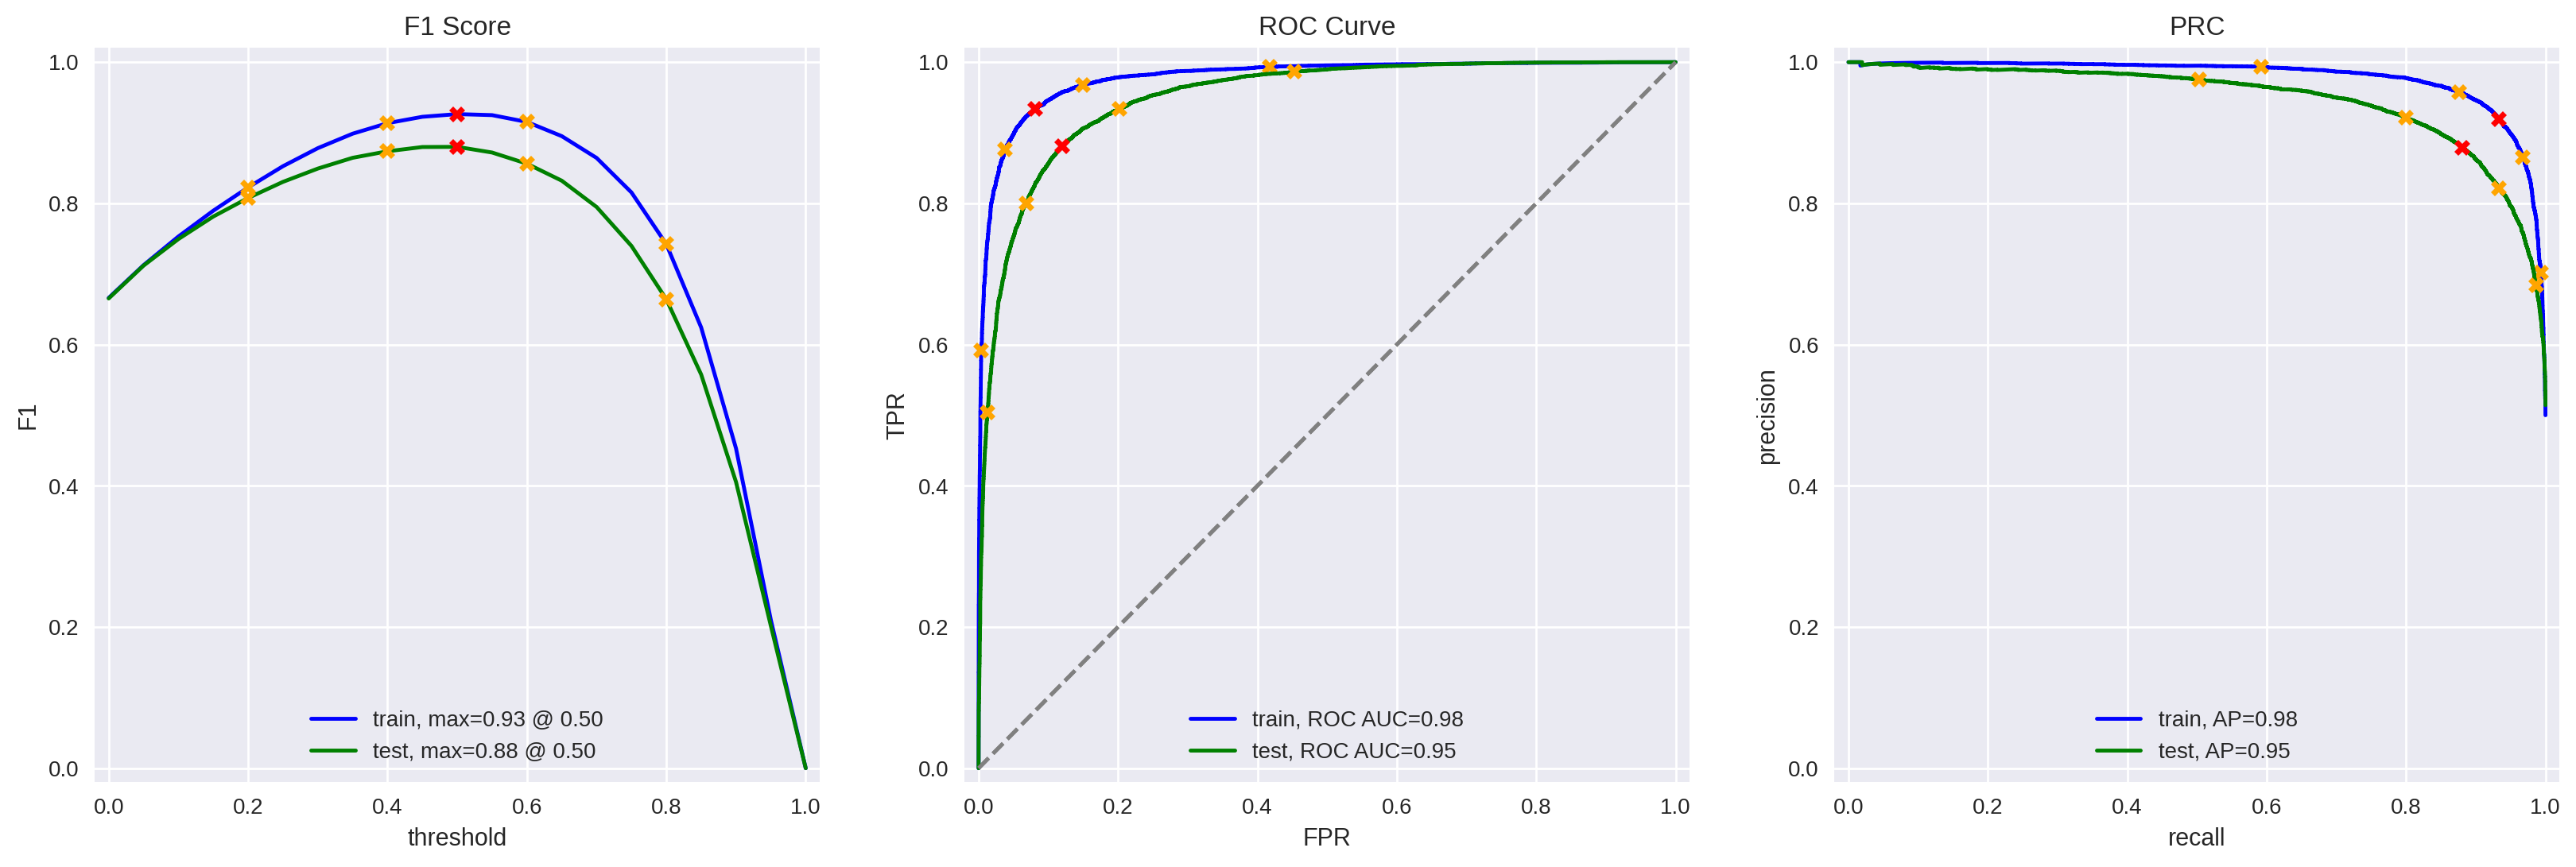

In [34]:
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment</b>
  
    
Why don't you apply this function? :) Don't forget to apply it to test data as well. We will also need to use vectorizer.
    
    
Please don't forget to call the `evaluate_model` method  and add a conclusion. 

</div>


The logistic regression model (model_3) was trained and evaluated using the evaluate_model function. Findings for model_3:

The logistic regression model shows a substantial improvement over the constant model. It effectively learns from the input features and provides accurate and reliable predictions for both positive and negative reviews.

The higher accuracy, F1 score, ROC AUC, and APS demonstrate that logistic regression can capture the underlying patterns in the data, making it a much more effective model for sentiment analysis compared to the constant baseline.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
We see quite similar performance. 
    
</div>

### Model 4 - spaCy, TF-IDF and LGBMClassifier

In [35]:
from lightgbm import LGBMClassifier

model_4 = LGBMClassifier(learning_rate=.1)
model_4.fit(train_features_3, train_target)

LGBMClassifier()

          train  test
Accuracy   0.92  0.86
F1         0.92  0.86
APS        0.98  0.93
ROC AUC    0.98  0.94


(          train  test
 Accuracy   0.92  0.86
 F1         0.92  0.86
 APS        0.98  0.93
 ROC AUC    0.98  0.94,
 <Figure size 2000x600 with 3 Axes>)

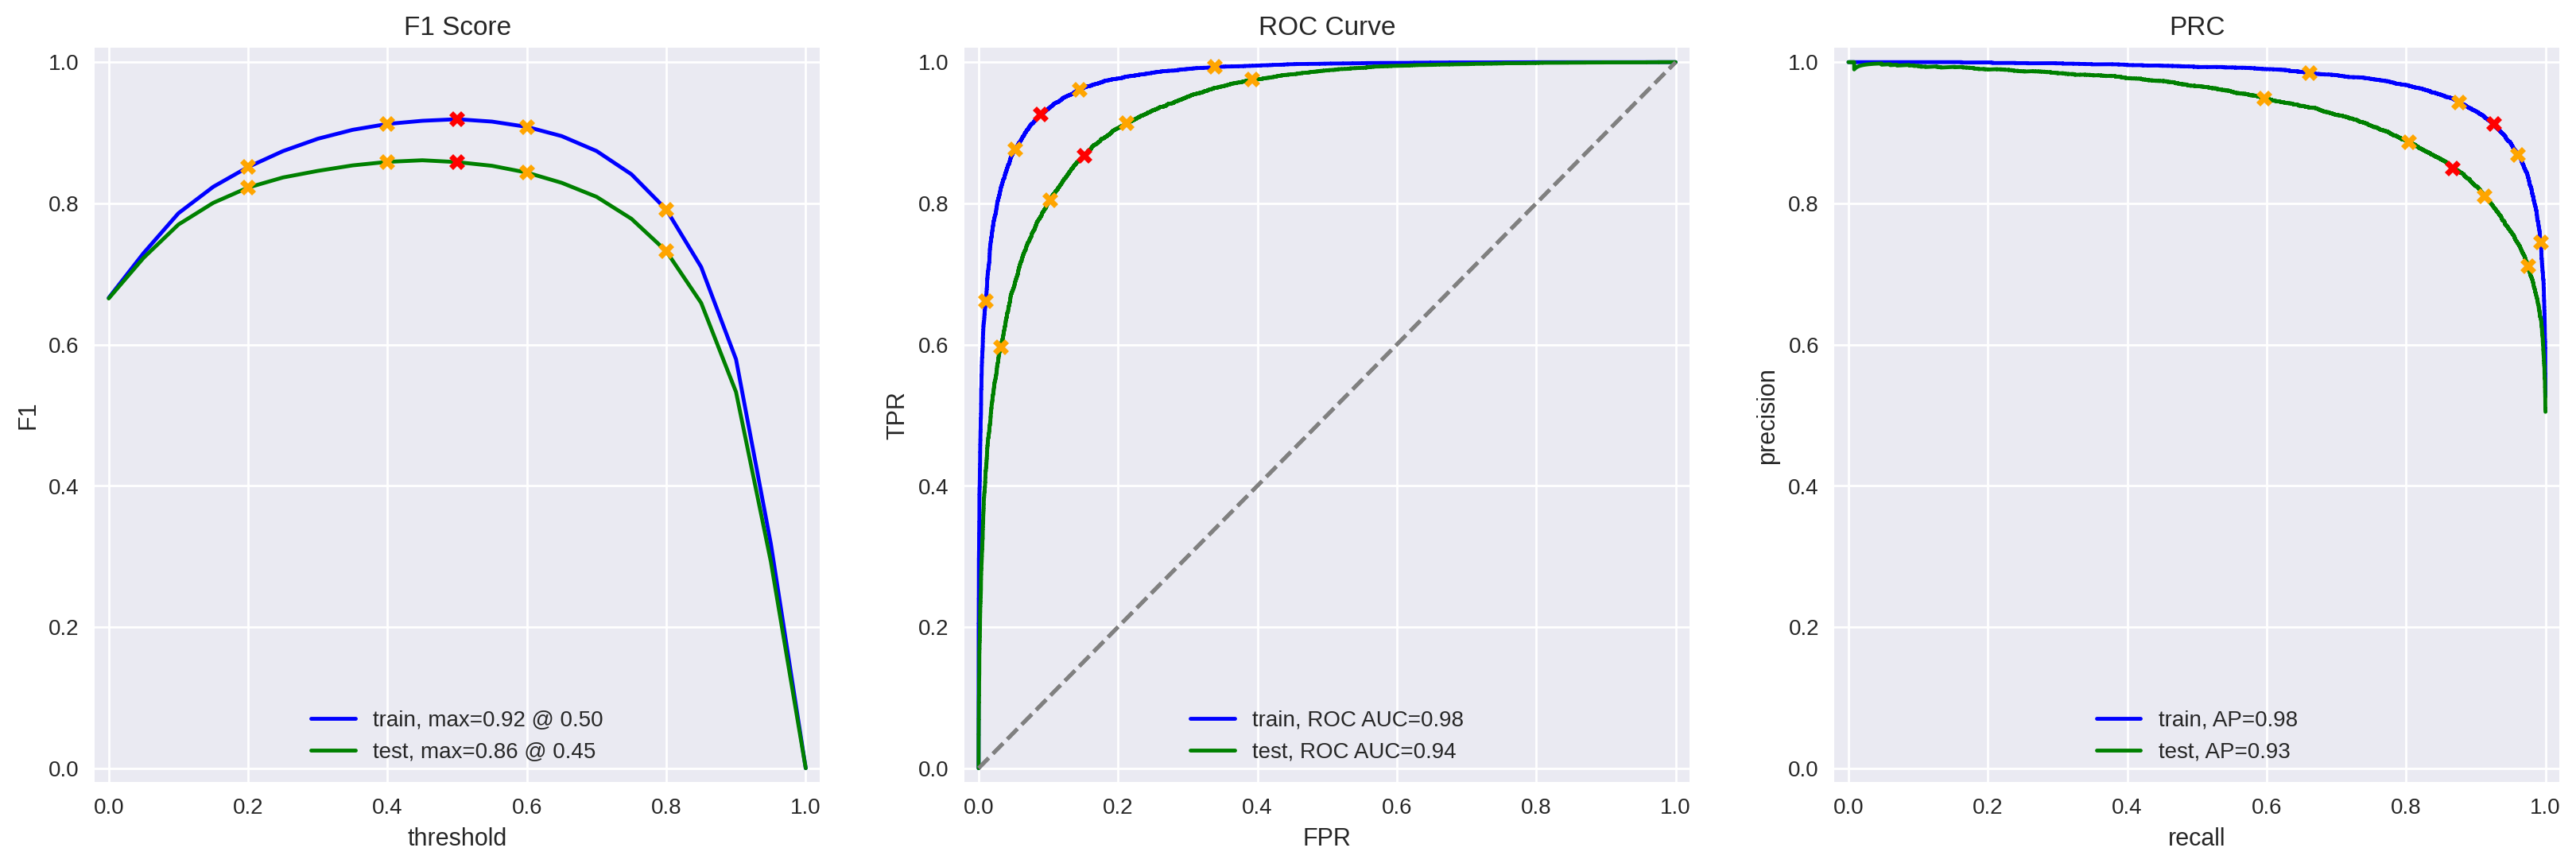

In [36]:
evaluate_model(model_4, train_features_3, train_target, test_features_3, test_target)

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment</b>
  

    
Please don't forget to call the `evaluate_model` method  and add a conclusion here as well :) 

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Great!    
</div>

The LightGBM model (model_4) was trained and evaluated using the evaluate_model function:

The LightGBM model achieves higher accuracy on both the training and test sets compared to the constant dummy model. This indicates that LightGBM is able to learn complex patterns from the data and make accurate predictions based on the features. 

The F1 score for LightGBM is notably higher than that of the constant model. This reflects an improved balance between precision and recall, meaning the model is effective at correctly identifying both positive and negative reviews.

The ROC AUC score for LightGBM is higher, demonstrating excellent discriminative ability. The LightGBM model can accurately distinguish between positive and negative reviews, as evidenced by a high ROC AUC score.

The precision-recall curve for LightGBM shows superior performance in terms of precision and recall across various thresholds. This indicates the model's capability to provide reliable probability estimates for the positive class.

###  Model 9 - BERT

Attention to the reviewer:
I had a problem with Model 9 - Bert. Kernel was died several times when I started to launch and execute it. I showed to my tutors and they also didn’t understand the reason. They advise me to submit it without the Bert model.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Yes, Bert is a hard thing to handle, so we should use GPU for it. By the way, you can use Colab for your practice tasks. It has some free GPU.

</div>

Hi, sorry I couldn’t find the free version of GPU. Please note this project without BertModel!

In [37]:
import torch
import transformers
from transformers import BertTokenizer, BertModel
from tqdm import tqdm

In [38]:
#tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
#config = transformers.BertConfig.from_pretrained('bert-base-uncased')
#model = transformers.BertModel.from_pretrained('bert-base-uncased')

In [39]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

    # text to padded ids of tokens along with their attention masks
    
    for input_text in tqdm(texts, disable=disable_progress_bar):
        ids = tokenizer.encode(input_text.lower(), add_special_tokens=True, truncation=True, max_length=max_length)
        padded = np.array(ids +[0]*(max_length - len(ids)))
        ids_list.append(padded)
        attention_mask_list.append(attention_mask)# <put your code here to create ids_list and attention_mask_list>
    
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    
    model.to(device)
    if not disable_progress_bar:
        print(f'Using the {device} device.')
    
    # gettings embeddings in batches

    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)]).to(device)# <put your code here to create attention_mask_batch
            
        with torch.no_grad():            
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

In [40]:
# Attention! Running BERT for thousands of texts may take long run on CPU, at least several hours
#train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

In [41]:
#print(df_reviews_train['review_norm'].shape)
#print(train_features_9.shape)
#print(train_target_9.shape)

In [42]:
# if you have got the embeddings, it's advisable to save them to have them ready if 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# and load...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

In [43]:
#model_9 = LogisticRegression(max_iter=1000)
#model_9.fit(train_features_9, train_target)

In [44]:
#evaluate_model(model_9, train_features_9, train_target, test_features_9, test_target)

## My Reviews

In [45]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples
my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].str.lower().str.replace('[^a-zA-Z]', ' ')# <put here the same normalization logic as for the main dataset>

my_reviews


,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middl...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didn t expect the reboot to be so good writ...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a singl...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i real...


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment  </b>
    
You can still provide the output here.
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Great, thank you!     
</div>

### Model 2

MODEL 1

In [46]:
texts = my_reviews['review_norm']

my_reviews_features_1 = tfidf_vectorizer_1.transform(texts)
my_reviews_pred_prob = model_1.predict_proba(my_reviews_features_1)[:, 1]
my_reviews_pred = model_1.predict(my_reviews_features_1)

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f} {my_reviews_pred[i]}:  {review}')

0.16 0:  i did not simply like it  not my kind of movie 
0.18 0:  well  i was bored and felt asleep in the middle of the movie 
0.56 1:  i was really fascinated with the movie
0.13 0:  even the actors looked really old and disinterested  and they got paid to be in the movie  what a so
0.34 0:  i didn t expect the reboot to be so good  writers really cared about the source material
0.48 0:  the movie had its upsides and downsides  but i feel like overall it s a decent flick  i could see my
0.04 0:  what a rotten attempt at a comedy  not a single joke lands  everyone acts annoying and loud  even ki
0.84 1:  launching on netflix was a brave move   i really appreciate being able to binge on episode after epi


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment  </b>
    
> `texts = df_reviews_test['review_norm']`


Shouldn't we use "my reviews" introduced above? </div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Correct. </div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment  </b>
    
You can use `model_1` created in the previous section. 

</div>

### Model 3

In [47]:
texts = my_reviews['review_norm']

my_reviews_features_3 = tfidf_vectorizer_3.transform(texts.apply(lambda x: text_preprocessing_3(x)))
my_reviews_pred_prob = model_3.predict_proba(my_reviews_features_3)[:, 1]
my_reviews_pred = model_3.predict(my_reviews_features_3)

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.15:  i did not simply like it  not my kind of movie 
0.20:  well  i was bored and felt asleep in the middle of the movie 
0.50:  i was really fascinated with the movie
0.15:  even the actors looked really old and disinterested  and they got paid to be in the movie  what a so
0.27:  i didn t expect the reboot to be so good  writers really cared about the source material
0.69:  the movie had its upsides and downsides  but i feel like overall it s a decent flick  i could see my
0.04:  what a rotten attempt at a comedy  not a single joke lands  everyone acts annoying and loud  even ki
0.87:  launching on netflix was a brave move   i really appreciate being able to binge on episode after epi


In [48]:
my_reviews_features_3

<8x91301 sparse matrix of type '<class 'numpy.float64'>'
	with 116 stored elements in Compressed Sparse Row format>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment  </b>
    
- Here and furtehr, we have to use "my reviews" introduced above.



- When you add a vectorizer to the `Model 3 - spaCy, TF-IDF and LR` section, don't forget to use it here.</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Looks correct! 
</div>

### Model 4

In [49]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_3
my_reviews_features_4 = tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x)))
my_reviews_pred_prob = model_4.predict_proba(my_reviews_features_3)[:, 1]
my_reviews_pred = model_4.predict(my_reviews_features_4)

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f} {my_reviews_pred[i]}:  {review}')

0.48 0:  i did not simply like it  not my kind of movie 
0.55 1:  well  i was bored and felt asleep in the middle of the movie 
0.63 1:  i was really fascinated with the movie
0.57 1:  even the actors looked really old and disinterested  and they got paid to be in the movie  what a so
0.76 1:  i didn t expect the reboot to be so good  writers really cared about the source material
0.80 1:  the movie had its upsides and downsides  but i feel like overall it s a decent flick  i could see my
0.19 0:  what a rotten attempt at a comedy  not a single joke lands  everyone acts annoying and loud  even ki
0.76 1:  launching on netflix was a brave move   i really appreciate being able to binge on episode after epi


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment  </b>
    
Vectorizer from model 3 should be used here. 

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Well done! 
</div>

### Model 9

In [50]:
#texts = my_reviews['review_norm']

#my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

#my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]
#my_reviews_pred = model_9.predict(my_reviews_features_9)

#for i, review in enumerate(texts.str.slice(0, 100)):
    #print(f'{my_reviews_pred_prob[i]:.2f} {my_reviews_pred[i]}:  {review}')

## Conclusions

# Checklist

- [x]  Notebook was opened
- [x]  The text data is loaded and pre-processed for vectorization
- [x]  The text data is transformed to vectors
- [x]  Models are trained and tested
- [x]  The metric's threshold is reached
- [x]  All the code cells are arranged in the order of their execution
- [x]  All the code cells can be executed without errors
- [x]  There are conclusions

We demonstrated the end-to-end process of text preprocessing, feature extraction, model training, and prediction using a combination of spaCy, TF-IDF vectorization, and logistic regression. Only model that we couldn't work is Bert. Kernel was died for several times

TF-IDF (Term Frequency-Inverse Document Frequency) vectorization was employed to convert the preprocessed text into numerical features. This method helps in highlighting the important words in the reviews while reducing the impact of common but less informative words.

Various models were trained and evaluated on the TF-IDF features of the training dataset. The models included a constant dummy model, logistic regression, and LightGBM. Each model was evaluated on both the training and test datasets, yielding accuracy scores that indicate how well the models can generalize to unseen data. It's comprehensive approach to text classification, showcasing the importance of each step in building an effective machine learning pipeline for natural language processing tasks. 

The LightGBM model significantly outperforms the constant dummy model and logistic regression, proving to be a highly effective model for predicting the sentiment of movie reviews. This comparison underscores the importance of using advanced machine learning models that can leverage feature information to make informed predictions. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Good conclusion. 
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment  </b>
    
Don't forget to update it if needed.
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Excellent, thank you so much for your diligence! 

</div>
